In [86]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('shrutimehta/zomato-restaurants-data', unzip = True, path ='.')

Dataset URL: https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data


In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
%matplotlib inline

In [88]:
df = pd.read_csv('zomato.csv', encoding='latin-1')

In [89]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [90]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [92]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Investigating Missing Values and Duplicate values

In [93]:
# Understanding how many null values we have
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [94]:
df[df['Cuisines'].isna()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


We can see we only have 9 missing values in cuisines. Now checking for duplicates.

In [95]:
# Check for duplicates
print('Amount of duplicate rows:',len(df[df.duplicated()]))

Amount of duplicate rows: 0


# Merge Two Datasets

In [96]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [97]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [262]:
# We want to merge the two dataframes on the country code column and keep the df table (left)
final_df = pd.merge(df, df_country, on = 'Country Code', how = 'left')

In [263]:
pd.set_option('display.max_columns', 22)

In [264]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# Renaming Columns 
I prefer to work with column names which are all lowercase and joined by '_'

In [265]:
final_df.columns = final_df.columns.str.lower().str.replace(' ', '_')

# Data Types 

In [266]:
print('Types before conversion:')
final_df.dtypes

Types before conversion:


restaurant_id             int64
restaurant_name          object
country_code              int64
city                     object
address                  object
locality                 object
locality_verbose         object
longitude               float64
latitude                float64
cuisines                 object
average_cost_for_two      int64
currency                 object
has_table_booking        object
has_online_delivery      object
is_delivering_now        object
switch_to_order_menu     object
price_range               int64
aggregate_rating        float64
rating_color             object
rating_text              object
votes                     int64
country                  object
dtype: object

In [267]:
def calculate_memory_usage(df_input): 
    '''Function to calculate memory usage of each column'''
    memory_usage = df_input.memory_usage(deep=True) 
    print('---Initial Memory Consumption---')
    print(memory_usage, end='\n\n')
    return memory_usage 

In [268]:
# Record initial memory usage
initial_memory = calculate_memory_usage(final_df)

---Initial Memory Consumption---
Index                       132
restaurant_id             76408
restaurant_name          693924
country_code              76408
city                     624274
address                 1064139
locality                 679894
locality_verbose         778878
longitude                 76408
latitude                  76408
cuisines                 734354
average_cost_for_two      76408
currency                 713419
has_table_booking        564667
has_online_delivery      565960
is_delivering_now        563543
switch_to_order_menu     563509
price_range               76408
aggregate_rating          76408
rating_color             599132
rating_text              611462
votes                     76408
country                  597464
dtype: int64



In [269]:
def map_to_bool(df): 
    '''Input in dataframe and columns to map to boolean values'''
    return df.map({'Yes': True, 'No': False}) # Map Yes to True, No to False

In [270]:
# Convert certain columns to booleans
columns_to_convert = [
    'has_table_booking',
    'has_online_delivery',
    'is_delivering_now',
    'switch_to_order_menu'
]    
final_df[columns_to_convert] = final_df[columns_to_convert].apply(map_to_bool)

In [271]:
# Map columns to string and category types
mapping_type_conversion = {
    'restaurant_name':'string',
    'address': 'string',
    'locality':'string', 
    'locality_verbose':'string',
    'cuisines':'string', 
    'rating_color': 'category',
    'rating_text':'category',
    'currency':'category',
    'city':'category',
    'country':'category'
}
final_df = final_df.astype(mapping_type_conversion)

In [272]:
# Types after conversion
print('Types after conversion:')
final_df.dtypes

Types after conversion:


restaurant_id                    int64
restaurant_name         string[python]
country_code                     int64
city                          category
address                 string[python]
locality                string[python]
locality_verbose        string[python]
longitude                      float64
latitude                       float64
cuisines                string[python]
average_cost_for_two             int64
currency                      category
has_table_booking                 bool
has_online_delivery               bool
is_delivering_now                 bool
switch_to_order_menu              bool
price_range                      int64
aggregate_rating               float64
rating_color                  category
rating_text                   category
votes                            int64
country                       category
dtype: object

In [273]:
def calculate_percentage_diff(initial,final):
    '''Returns percentage difference between the two pandas series'''
    return (final-initial)/initial *100

In [274]:
# Calculate final memory usage
final_memory = calculate_memory_usage(final_df)
# Calculate percentage change
memory_reduction_percent = calculate_percentage_diff(
    initial = initial_memory,
    final = final_memory
)
# Print memory reduction 
print('---Memory Reduction Percentage--')
print(memory_reduction_percent)

---Initial Memory Consumption---
Index                       132
restaurant_id             76408
restaurant_name          693924
country_code              76408
city                      32636
address                 1064139
locality                 679894
locality_verbose         778878
longitude                 76408
latitude                  76408
cuisines                 734642
average_cost_for_two      76408
currency                  10755
has_table_booking          9551
has_online_delivery        9551
is_delivering_now          9551
switch_to_order_menu       9551
price_range               76408
aggregate_rating          76408
rating_color              10100
rating_text               10107
votes                     76408
country                   11090
dtype: int64

---Memory Reduction Percentage--
Index                    0.000000
restaurant_id            0.000000
restaurant_name          0.000000
country_code             0.000000
city                   -94.772167
address       

# Map of Restaurant Locations 

# Questions to answer
## Univariate Analysis 
1. What countries have the most restaurants listed on Zomato
2. How many restaurants offer delivery
3. What is the average cost, and delivery of cost for two 
4. What is the average rating of restaurant

### 1. Representing the amount of restaurant reviews for each country

In [275]:
plt.style.use('seaborn-v0_8-whitegrid')

In [276]:
country_grp = final_df.groupby('country', observed = True).agg({'country':'count'})

In [277]:
country_grp = country_grp.rename(columns={'country':'count'}).sort_values(by='count', ascending = False)
country_grp = country_grp.reset_index()

In [278]:
# Top 10 countries that use Zomato
country_grp.head(10)

,country,count
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,South Africa,60
5,UAE,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


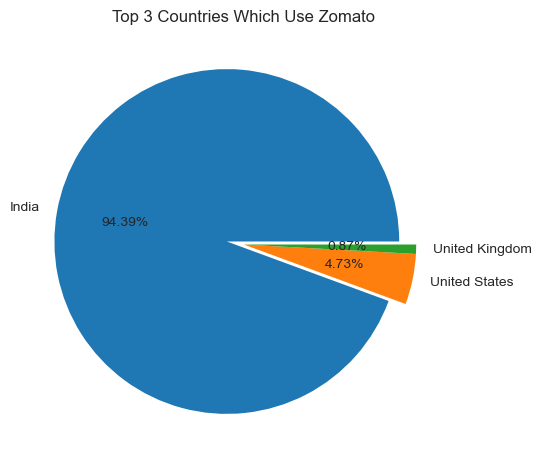

In [279]:
# Top 3 countries which use Zomato 
plt.pie(
    x = country_grp['count'][:3],
    labels = country_grp['country'][:3],
    explode = [0.1,0,0],
    autopct = '%0.2f%%'
)
plt.title('Top 3 Countries Which Use Zomato', pad = 5)
plt.tight_layout()
plt.show()

Observation: 
- Majority of transactions/records are from India and few in the US

### 2. How many restaurants offer delivery?

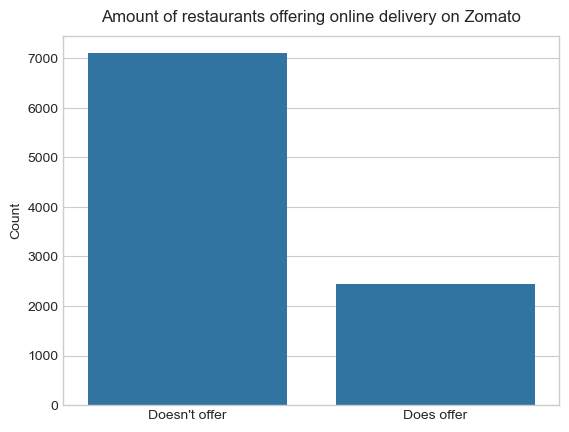

In [280]:
sns.countplot(data = final_df, x = 'has_online_delivery')
plt.xticks(ticks = [False,True], labels=['Doesn\'t offer', 'Does offer'])
plt.xlabel(None)
plt.ylabel('Count')
plt.title('Amount of restaurants offering online delivery on Zomato', pad =10)
plt.show()

Observation: 
- Majority of restaurants do not offer delivery

### 3. What is the average cost, and delivery of cost for two 
- Issue: Currency is not standardised
- Solution: Standardise results to USD; get current exchange rates and create function to convert

In [297]:
# See all unique currencies 
list(final_df['currency'].unique())

# Use ChatGPT to generate a mapping (to currency code) for each of these values
currency_mapping = {
    'Botswana Pula(P)': 'BWP',
    'Brazilian Real(R$)': 'BRL',
    'Dollar($)': 'USD',
    'Emirati Diram(AED)': 'AED',
    'Indian Rupees(Rs.)': 'INR',
    'Indonesian Rupiah(IDR)': 'IDR',
    'NewZealand($)': 'NZD',
    'Pounds(\x8c£)': 'GBP',
    'Qatari Rial(QR)': 'QAR',
    'Rand(R)': 'ZAR',
    'Sri Lankan Rupee(LKR)': 'LKR',
    'Turkish Lira(TL)': 'TRY'
}
# Apply currency mapping 
final_df['currency_code'] = final_df['currency'].map(currency_mapping)

In [299]:
list(final_df['currency_code'].unique())

['BWP',
 'BRL',
 'USD',
 'AED',
 'INR',
 'IDR',
 'NZD',
 'GBP',
 'QAR',
 'ZAR',
 'LKR',
 'TRY']

For this I used an API, you can create your own api key 
'url = 'https://v6.exchangerate-api.com/v6/YOUR-API-KEY-HERE/latest/USD'

In [301]:
import requests

In [302]:
# Using ExchangeRate-Api to get current exchange rates where USD is base currency
url = 'https://v6.exchangerate-api.com/v6/eaa0fad84b5325872d0abf53/latest/USD'

# Making our request
response = requests.get(url)
exchange_data = response.json()

# Your JSON object
print(exchange_data)

{'result': 'success', 'documentation': 'https://www.exchangerate-api.com/docs', 'terms_of_use': 'https://www.exchangerate-api.com/terms', 'time_last_update_unix': 1723507201, 'time_last_update_utc': 'Tue, 13 Aug 2024 00:00:01 +0000', 'time_next_update_unix': 1723593601, 'time_next_update_utc': 'Wed, 14 Aug 2024 00:00:01 +0000', 'base_code': 'USD', 'conversion_rates': {'USD': 1, 'AED': 3.6725, 'AFN': 70.8106, 'ALL': 91.5682, 'AMD': 388.3061, 'ANG': 1.79, 'AOA': 888.5234, 'ARS': 939.83, 'AUD': 1.518, 'AWG': 1.79, 'AZN': 1.7005, 'BAM': 1.7897, 'BBD': 2.0, 'BDT': 117.5358, 'BGN': 1.7898, 'BHD': 0.376, 'BIF': 2883.837, 'BMD': 1.0, 'BND': 1.3244, 'BOB': 6.9187, 'BRL': 5.4968, 'BSD': 1.0, 'BTN': 83.9729, 'BWP': 13.5406, 'BYN': 3.2672, 'BZD': 2.0, 'CAD': 1.3737, 'CDF': 2845.4007, 'CHF': 0.8662, 'CLP': 932.4122, 'CNY': 7.1775, 'COP': 4075.5872, 'CRC': 529.3092, 'CUP': 24.0, 'CVE': 100.9003, 'CZK': 23.0374, 'DJF': 177.721, 'DKK': 6.8266, 'DOP': 59.7156, 'DZD': 134.5668, 'EGP': 49.3062, 'ERN': 15

In [303]:
# Extract conversion rates, gives as dictionary
conversion_rates = exchange_data['conversion_rates']

In [304]:
def convert_to_usd(cost,currency,conversion_rates): 
    '''Takes input of cost for two, currency code for row, and conversion rates 
    and calculates the cost in USD'''
    curr_rate = conversion_rates.get(currency,1) # Find current conversion rate
    if cost: 
        return cost / curr_rate
    else:
        return np.nan

In [307]:
final_df['average_cost_for_two_USD'] = final_df.apply(lambda row: convert_to_usd(
    row['average_cost_for_two'],
    row['currency_code'],
    conversion_rates),
    axis = 1
)

In [308]:
final_df['average_cost_for_two_USD'].describe()

count    9533.000000
mean       10.071155
std        16.870149
min         0.595468
25%         3.572811
50%         5.954685
75%        10.000000
max       500.000000
Name: average_cost_for_two, dtype: float64

Observations: 
- Average cost in USD for a meal for two is 10 USD, 5 USD per person
- The std is quite high at 16 USD; further investigation needed to determine if this is 
because of location or quality of restaurant or both
- The median is low at nearly 6 USD; median being lower than the mean suggests that the average cost may be skewed by large outliers 
- 75% of cost of meals for two is 10 USD or less; still relatively inexpensive, clear that there must be large outliers at play.

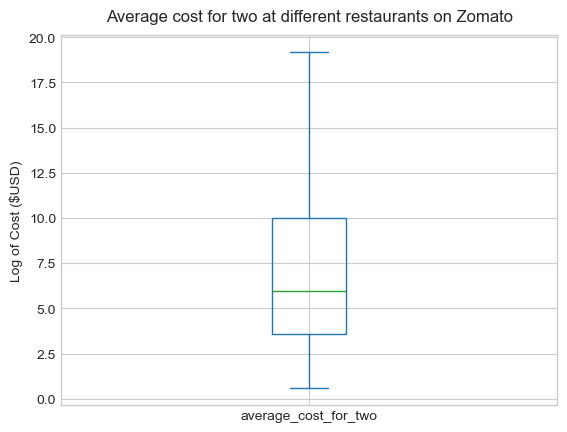

In [329]:
# Box plot of average cost for two with outliers removed 
final_df.plot(kind = 'box', y = 'average_cost_for_two_USD', showfliers = False)
plt.ylabel('Cost ($USD)')
plt.title('Average cost for two at different restaurants on Zomato',pad = 10)
plt.tight_layout()
plt.show()

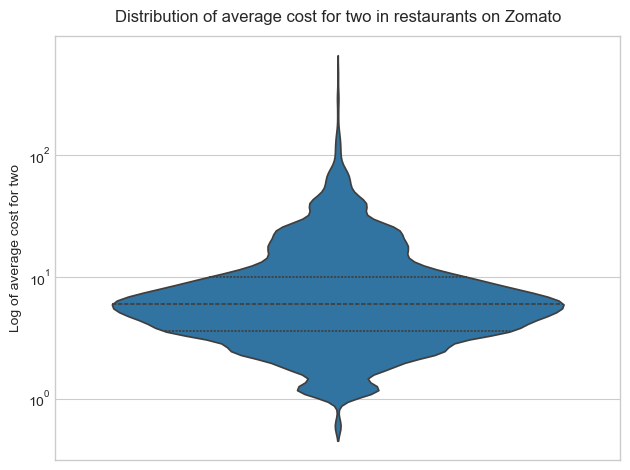

In [334]:
sns.violinplot(
    data = final_df,
    y='average_cost_for_two_USD',
    inner = 'quartz', 
    log_scale= True
)
plt.ylabel('Log of average cost for two')
plt.title('Distribution of average cost for two in restaurants on Zomato', pad = 10)
plt.tight_layout()
plt.show()

Observations: 
- Reconfirms suspicions that data for average cost for two is being heavily skewed by higher priced outliers

### 4. What is the average rating of restaurant
Issue: Restaurants which are not rated have an aggregate rating of 0, gives the distributions a right skew.
Solution: Temporarily remove restaurants which are not rated from the dataset

In [356]:
# Only look at restaurants which are rated 
rated_df = final_df.query("rating_text != 'Not rated'")

In [357]:
# Rating is between 0-5 stars 
rated_df['aggregate_rating'].describe()

count    7403.000000
mean        3.440024
std         0.552195
min         1.800000
25%         3.000000
50%         3.400000
75%         3.800000
max         4.900000
Name: aggregate_rating, dtype: float64

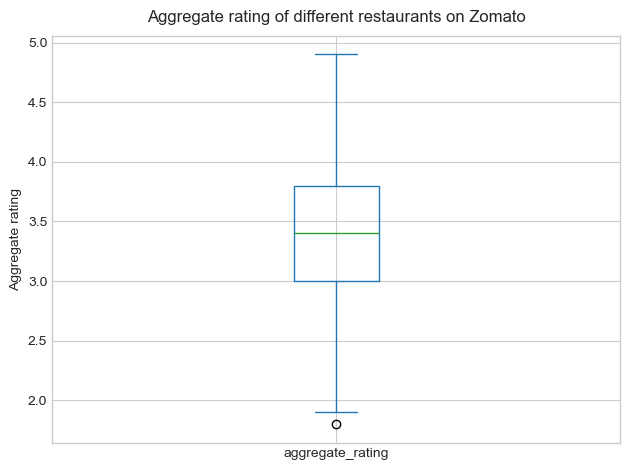

In [358]:
rated_df.plot(kind = 'box', y ='aggregate_rating')
plt.ylabel('Aggregate rating')
plt.title('Aggregate rating of different restaurants on Zomato',pad = 10)
plt.tight_layout()
plt.show()

<Axes: xlabel='aggregate_rating', ylabel='Count'>

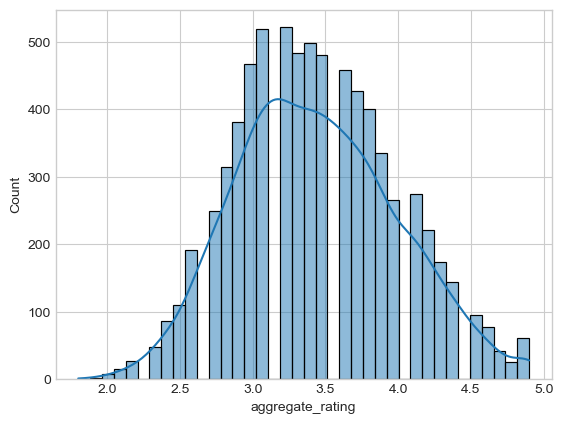

In [359]:
# Histogram with KDE 
sns.histplot(data = rated_df, x = 'aggregate_rating', kde = True)

Observations: 
- Normal distribution of results, slight right skew
- Most restuarants (> 75%) are 3 stars or above 
- Some low rated outliers
- No restaurant has 5 star rating 
- Fairly large standard deviation of 0.55 

### Question 5: Most common cuisines
Issue: Some restaurants have multiple cuisines
Solution: need to extract each one and create a tally

## Bivariate & Multivariate Analysis
Questions: 
1. Correlation between rating and average cost for two / price range
        Does average rating increase when number of votes increases?
2. Correlation between rating and country or rating and city (for India)
3. Cities with the most and highest rated restaurants
4. Top rated cuisines 
3. Comparasion between restaurants that deliver vs not and rating 

India or city Specific 
1. Heatmap of where best rated restaurants are / best areas 